In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


Volume Rendering
~~~~~~~~~~~~~~~~

Volume render uniform mesh types like :class:`pyvista.UniformGrid` or 3D
NumPy arrays.

This also explores how to extract a volume of interest (VOI) from a
:class:`pyvista.UniformGrid` using the
:func:`pyvista.UniformGridFilters.extract_subset` filter.


In [2]:
# sphinx_gallery_thumbnail_number = 3
import pyvista as pv
from pyvista import examples

# Volume rendering is not supported with Panel yet
pv.rcParams["use_panel"] = False

# Download a volumetric dataset
vol = examples.download_knee_full()
vol

UniformGrid (0x7f0b123b17c0)
  N Cells:	10225800
  N Points:	10368384
  X Bounds:	0.000e+00, 1.497e+02
  Y Bounds:	0.000e+00, 1.786e+02
  Z Bounds:	0.000e+00, 2.000e+02
  Dimensions:	208, 248, 201
  Spacing:	7.230e-01, 7.230e-01, 1.000e+00
  N Arrays:	1

Simple Volume Render
++++++++++++++++++++




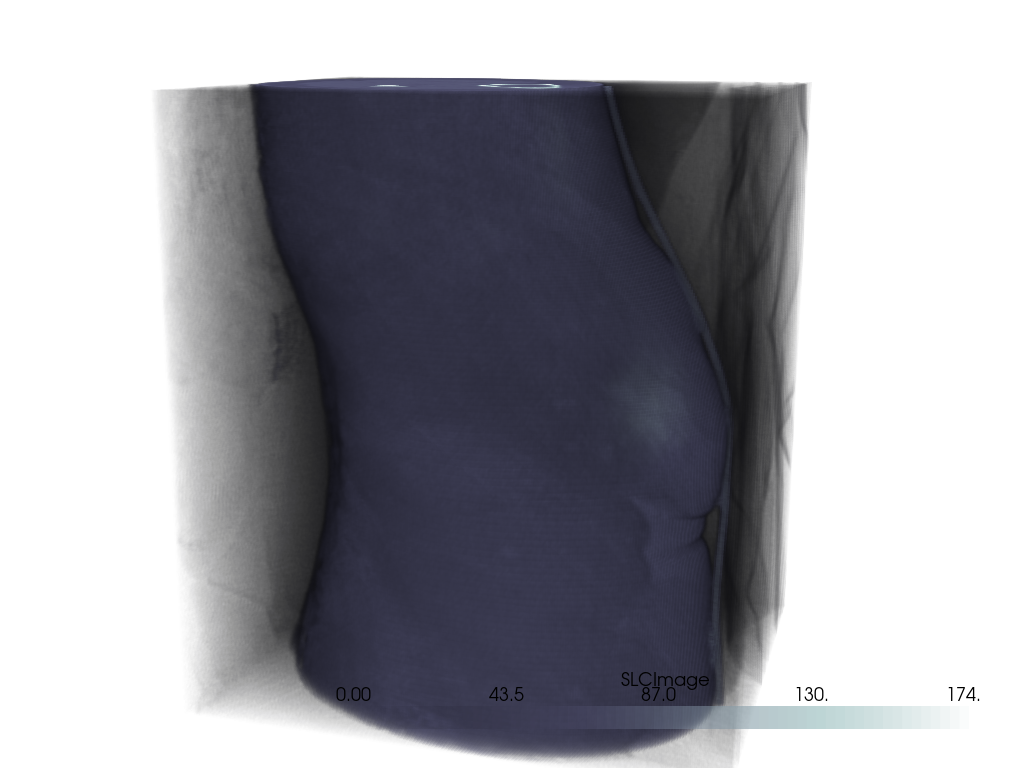

In [4]:
# A nice camera position
cpos = [(-381.74, -46.02, 216.54), (74.8305, 89.2905, 100.0), (0.23, 0.072, 0.97)]

vol.plot(volume=True, cmap="bone", cpos=cpos)

Opacity Mappings
++++++++++++++++

Or use the :func:`pyvista.BasePlotter.add_volume` method like below.
Note that here we use a non-default opacity mapping to a sigmoid:



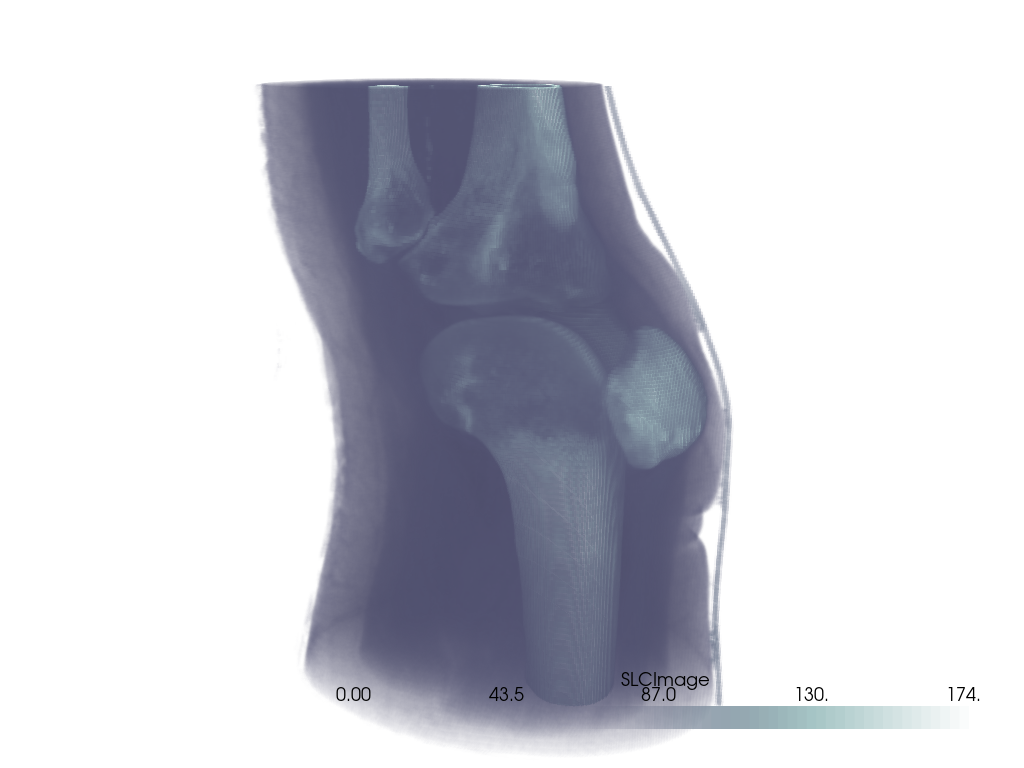

In [5]:
p = pv.Plotter()
p.add_volume(vol, cmap="bone", opacity="sigmoid")
p.camera_position = cpos
p.show()

You can also use a custom opacity mapping



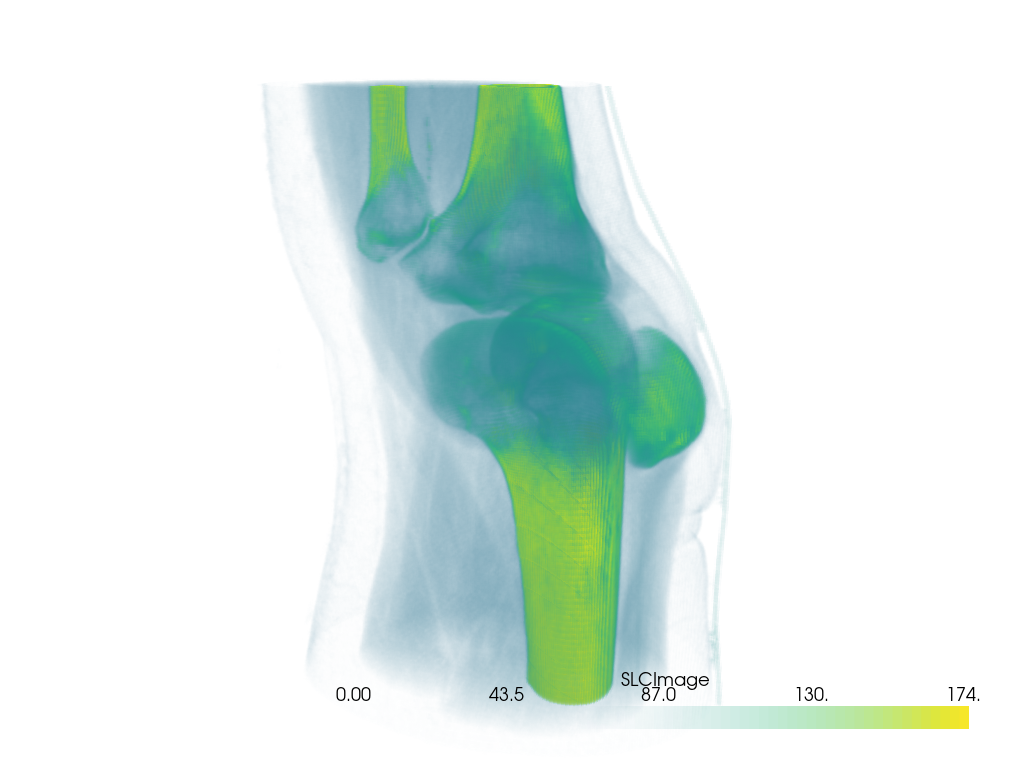

In [6]:
opacity = [0, 0, 0, 0.1, 0.3, 0.6, 1]

p = pv.Plotter()
p.add_volume(vol, cmap="viridis", opacity=opacity)
p.camera_position = cpos
p.show()

We can also use a shading technique when volume rendering with the ``shade``
option



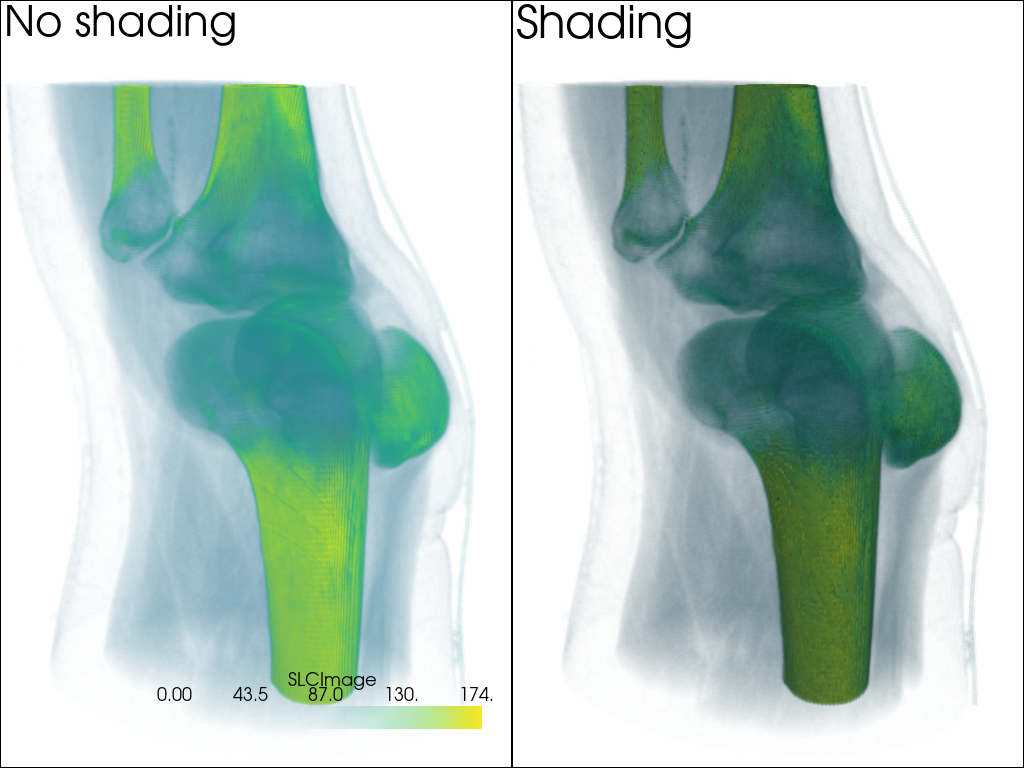

In [7]:
p = pv.Plotter(shape=(1,2))
p.add_volume(vol, cmap="viridis", opacity=opacity, shade=False)
p.add_text("No shading")
p.subplot(0,1)
p.add_volume(vol, cmap="viridis", opacity=opacity, shade=True)
p.add_text("Shading")
p.link_views()
p.camera_position = cpos
p.show()

Cool Volume Examples
++++++++++++++++++++

Here are a few more cool volume rendering examples



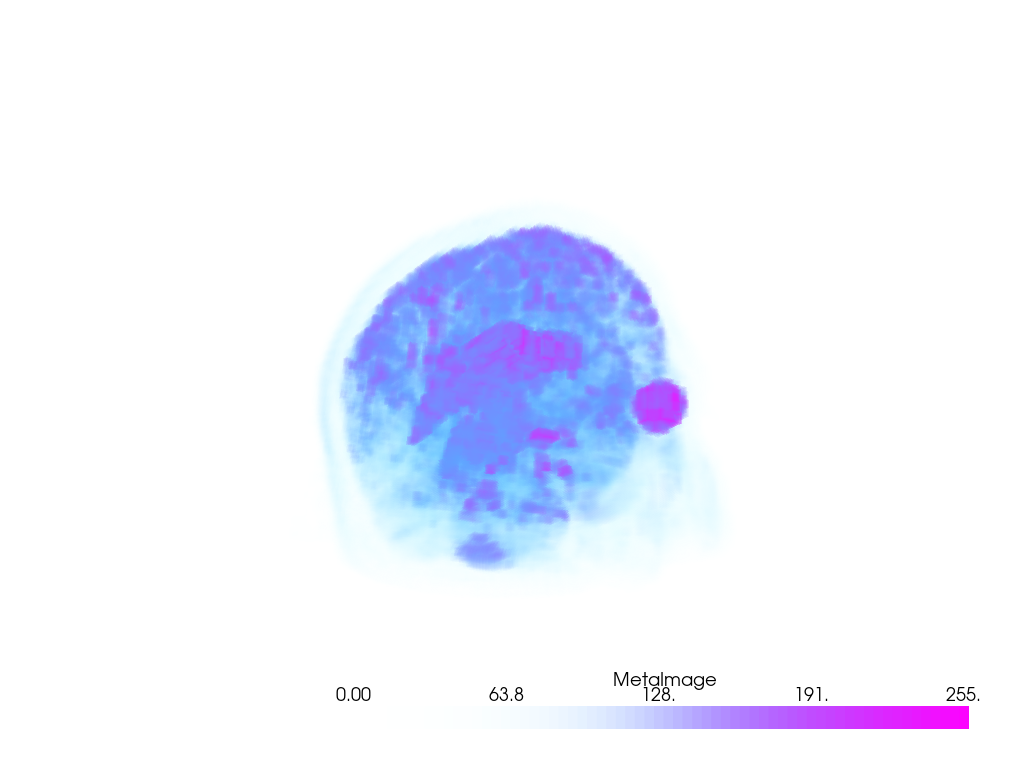

In [8]:
head = examples.download_head()

p = pv.Plotter()
p.add_volume(head, cmap="cool", opacity="sigmoid_6")
p.camera_position = [(-228.0, -418.0, -158.0), (94.0, 122.0, 82.0), (-0.2, -0.3, 0.9)]
p.show()

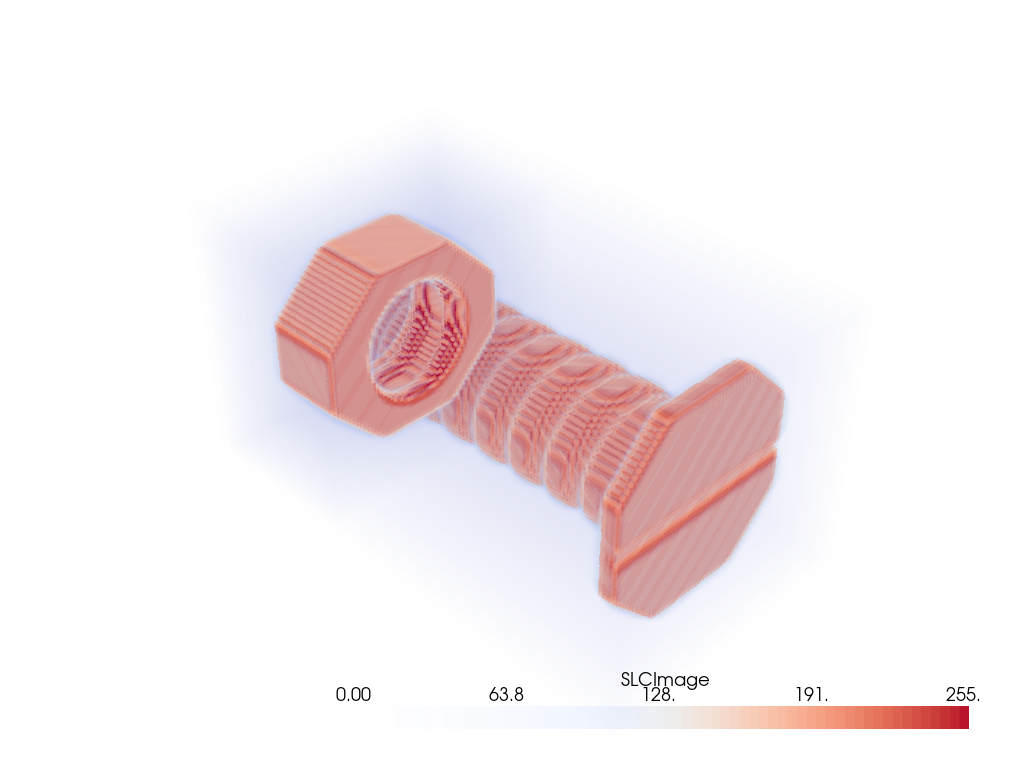

In [9]:
bolt_nut = examples.download_bolt_nut()

p = pv.Plotter()
p.add_volume(bolt_nut, cmap="coolwarm", opacity="sigmoid_5")
p.show()

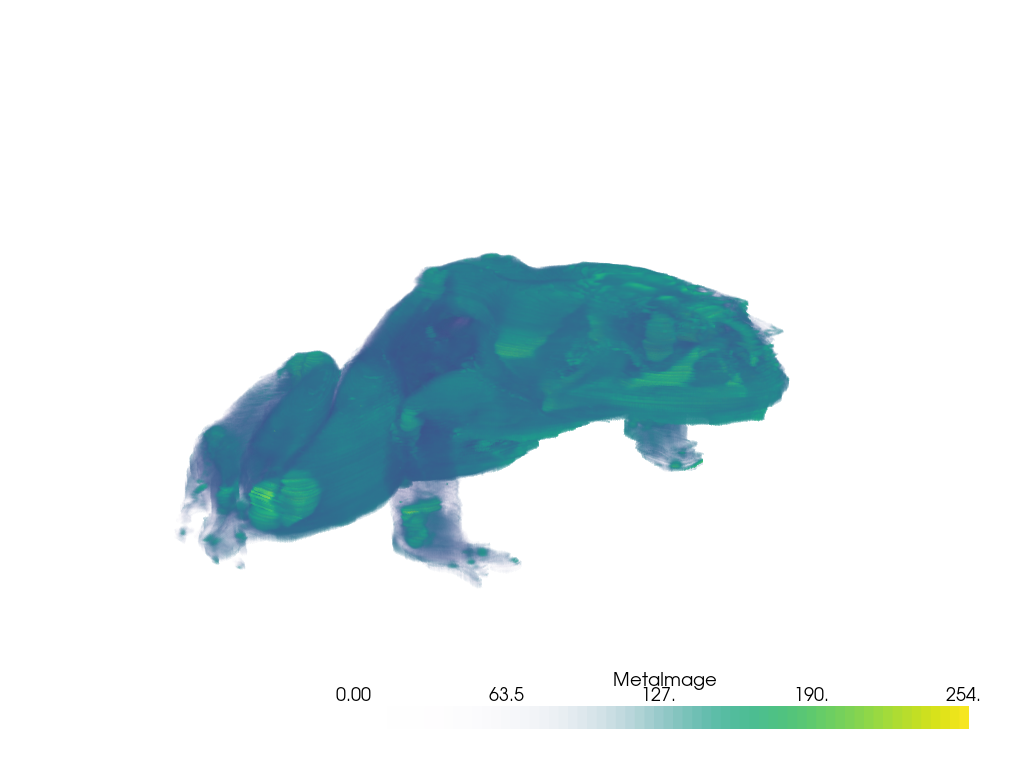

In [10]:
frog = examples.download_frog()

p = pv.Plotter()
p.add_volume(frog, cmap="viridis", opacity="sigmoid_6")
p.camera_position = [(929., 1067., -278.9),
                     (249.5, 234.5, 101.25),
                     (-0.2048, -0.2632, -0.9427)]
p.show()

Extracting a VOI
++++++++++++++++

Use the :func:`pyvista.UniformGridFilters.extract_subset` filter to extract
a volume of interest/subset volume to volume render. This is ideal when
dealing with particularly large volumes and you want to volume render only
a specific region.



In [11]:
# Load a particularly large volume
large_vol = examples.download_damavand_volcano()
large_vol

UniformGrid (0x7f0b057af1a0)
  N Cells:	11003760
  N Points:	11156040
  X Bounds:	4.130e+05, 6.920e+05
  Y Bounds:	3.864e+06, 4.096e+06
  Z Bounds:	-5.479e+04, 5.302e+03
  Dimensions:	280, 233, 171
  Spacing:	1.000e+03, 1.000e+03, 3.535e+02
  N Arrays:	1

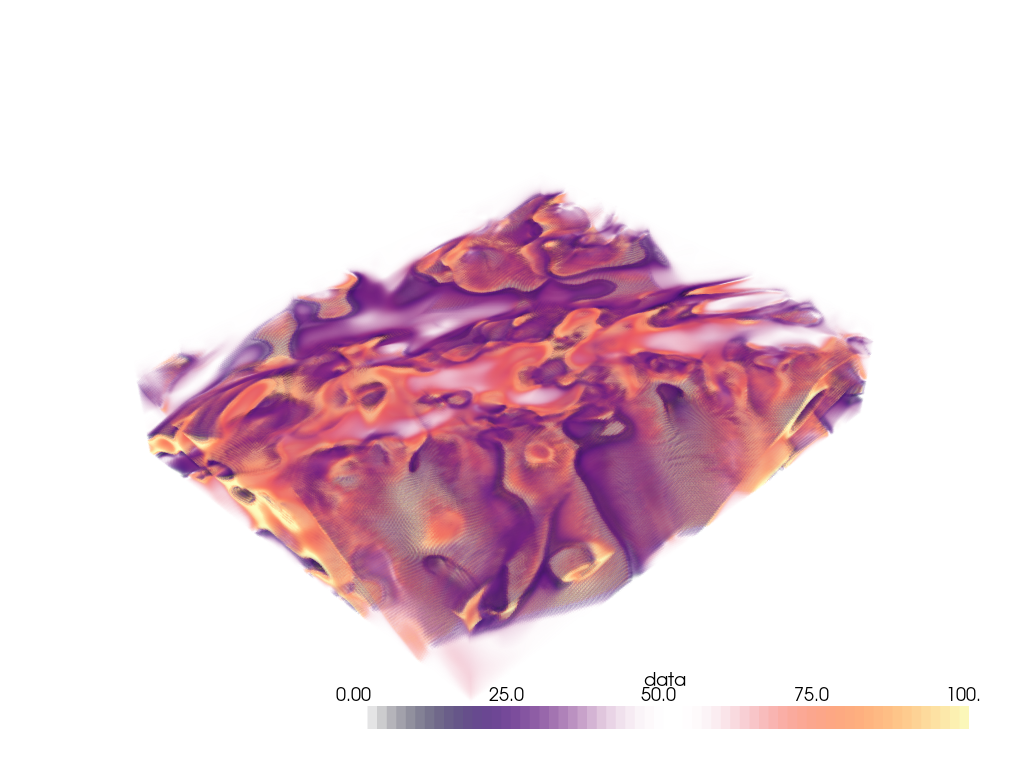

In [12]:
opacity = [0, 0.75, 0, 0.75, 1.0]
clim = [0, 100]

p = pv.Plotter()
p.add_volume(large_vol, cmap="magma", clim=clim,
             opacity=opacity, opacity_unit_distance=6000,)
p.show()

Woah, that's a big volume! We probably don't want to volume render the
whole thing. So let's extract a region of interest under the volcano.

The region we will extract will be between nodes 175 and 200 on the x-axis,
between nodes 105 and 132 on the y-axis, and between nodes 98 and 170 on
the z-axis.



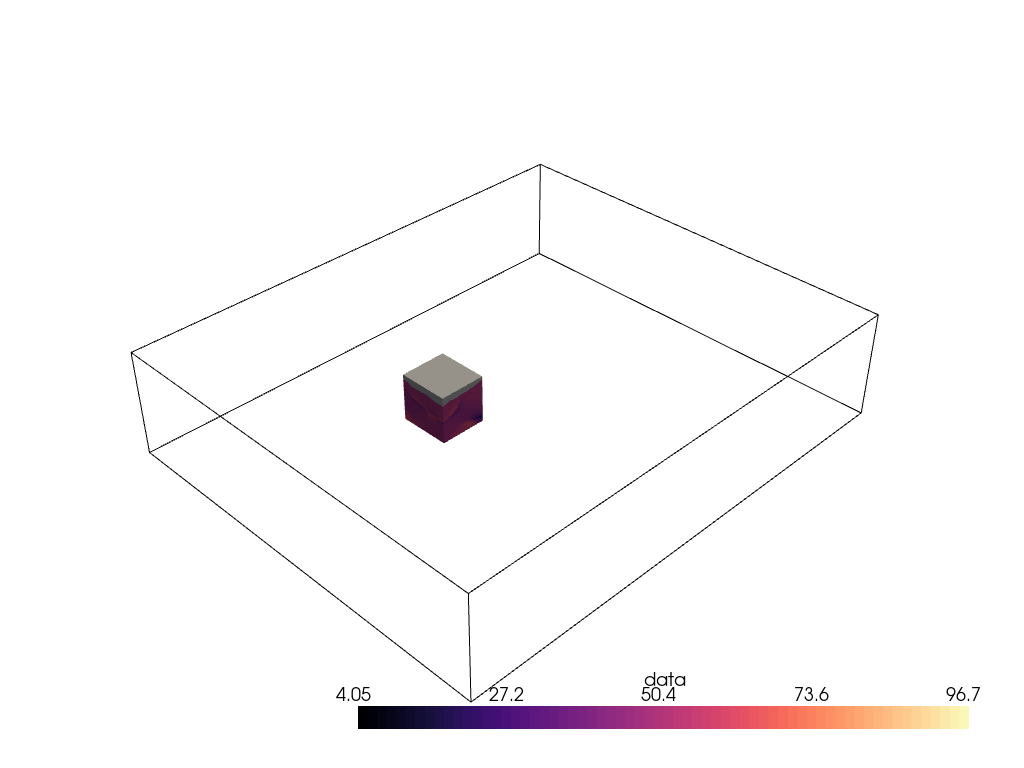

In [13]:
voi = large_vol.extract_subset([175, 200, 105, 132, 98, 170])

p = pv.Plotter()
p.add_mesh(large_vol.outline(), color="k")
p.add_mesh(voi, cmap="magma")
p.show()

Ah, much better. Let's now volume render that region of interest!



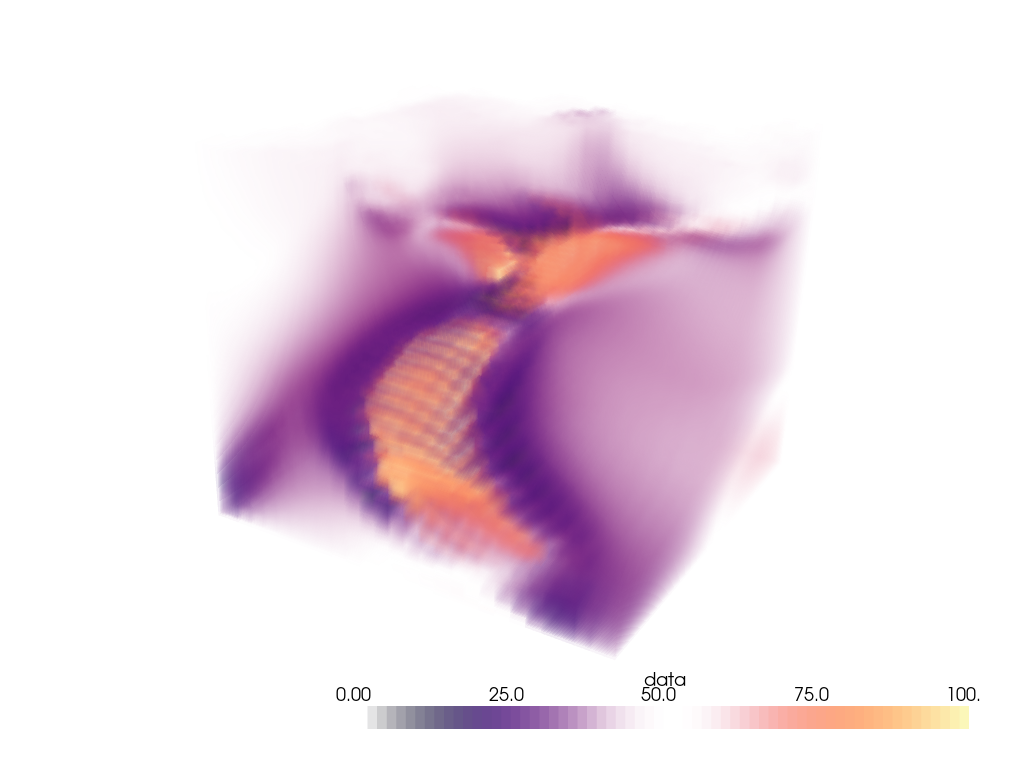

In [14]:
p = pv.Plotter()
p.add_volume(voi, cmap="magma", clim=clim, opacity=opacity,
             opacity_unit_distance=2000)
p.camera_position = [(531554.5542909054, 3944331.800171338, 26563.04809259223),
 (599088.1433822059, 3982089.287834022, -11965.14728669936),
 (0.3738545892415734, 0.244312810377319, 0.8947312427698892)]
p.show()